# **Optimistic Greedy vs Realistic ε-Greedy**

Greedy: zawsze wybieramy akcję maksymalizującą nagrodę <br>
ε-Greedy: z dużym prawdopodobieństwem (1-ε) wybieramy akcję maksymalizującą nagrodę, a z małym prawdopodobieństwem ε wybieramy losową akcję

Optimistic: Q_1 = 5, zachęcamy agenta do eksploracji <br>
Realistic: Q_1 = 0

In [1]:
import random
import matplotlib.pyplot as plt

def bandit(a: int) -> float:
    if a == 0:
        return random.uniform(0.1, 1)
    else:
        return random.uniform(0, 1)

Test dla 10^5 gier

In [2]:
# Realistic ε-Greedy
eps = .1
Q_eps = [0 for _ in range(10)]
N_eps = [0 for _ in range(10)]

for _ in range(100000):
    if random.random() < eps:
        a = random.randint(0, 9)
    else:
        a = random.choice([i for i, x in enumerate(Q_eps) if x == max(Q_eps)])
    r = bandit(a)
    N_eps[a] += 1
    Q_eps[a] += (r - Q_eps[a]) / N_eps[a]

print(Q_eps)
print(N_eps)

[0.55003030395888, 0.4912945129389564, 0.4850992206877557, 0.49968009334067187, 0.5065887759929146, 0.49859355081695644, 0.5050077300347404, 0.48798067922688604, 0.5038189943570804, 0.5090387841694919]
[90901, 1036, 1052, 1032, 981, 955, 1037, 1044, 1002, 960]


In [3]:
# Optimistic Greedy
Q = [5 for _ in range(10)]
N = [0 for _ in range(10)]

for _ in range(100000):
    a = random.choice([i for i, x in enumerate(Q) if x == max(Q)])
    r = bandit(a)
    N[a] += 1
    Q[a] += .1 * (r - Q[a])
print(Q)
print(N)


[0.5058052249905072, 0.3064373097272054, 0.31942906426357554, 0.30459734747725614, 0.29890231203722784, 0.32305959359988606, 0.30040501442264234, 0.31605155953447567, 0.31604453215047296, 0.32069878810073793]
[94449, 1168, 937, 144, 191, 353, 92, 972, 1000, 694]


# **Symulacja**

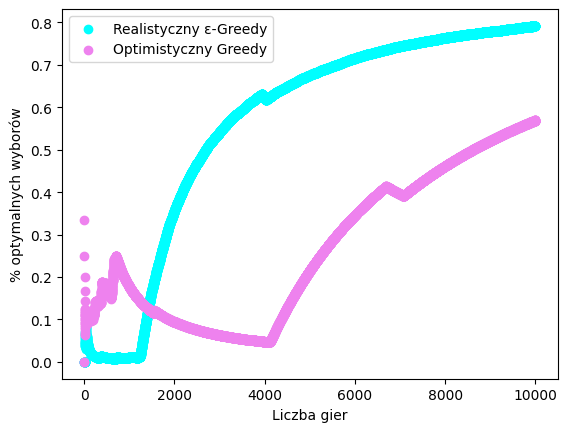

In [5]:
eps = .1
optimal_percentage = []

Q_eps = [0 for _ in range(10)]
N_eps = [0 for _ in range(10)]

Q = [5 for _ in range(10)]
N = [0 for _ in range(10)]

T = 10000
for games_amt in range(1, T):
    if random.random() < eps:
        a = random.randint(0, 9)
    else:
        a = random.choice([i for i, x in enumerate(Q_eps) if x == max(Q_eps)])
    r = bandit(a)
    N_eps[a] += 1
    Q_eps[a] += (r - Q_eps[a]) / N_eps[a]

    a = random.choice([i for i, x in enumerate(Q) if x == max(Q)])
    r = bandit(a)
    N[a] += 1
    Q[a] += .1 * (r - Q[a])
    
    optimal_percentage.append((N_eps[0]/games_amt, N[0]/games_amt))

plt.scatter(range(1, T), [x[0] for x in optimal_percentage], label='Realistyczny ε-Greedy', c='cyan')
plt.scatter(range(1, T), [x[1] for x in optimal_percentage], label='Optimistyczny Greedy', c='violet')
plt.xlabel('Liczba gier')
plt.ylabel('% optymalnych wyborów')
plt.legend()
plt.show()
